In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

In [56]:
df_sales=pd.read_excel('superstore.xlsx',sheet_name='2018')
df_sales['Sales']=pd.to_numeric(df_sales['Sales'],errors='coerce').replace(np.nan,0)
print(df_sales.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0    13.0  CA-2017-114412   2018/4/15   4/20/2017  Standard Class    AA-10480   
1    24.0  US-2017-156909   2018/7/16   7/18/2017    Second Class    SF-20065   
2    35.0  CA-2017-107727  2018/10/19  10/23/2017    Second Class    MA-17560   
3    42.0  CA-2017-120999   2018/9/10   9/15/2017  Standard Class    LC-16930   
4    44.0  CA-2017-139619   2018/9/19   9/23/2017  Standard Class    ES-14080   

     Customer Name      Segment        Country          City  ...  \
0     Andrew Allen     Consumer  United States       Concord  ...   
1  Sandra Flanagan     Consumer  United States  Philadelphia  ...   
2     Matt Abelman  Home Office  United States       Houston  ...   
3   Linda Cazamias    Corporate  United States    Naperville  ...   
4       Erin Smith    Corporate  United States     Melbourne  ...   

  Sub-Category                                       Product Name    Sales  \
0        Paper      

In [55]:
del sales_clean
del df_sales

In [57]:
sales_clean=df_sales.loc[(df_sales['Order ID'].notnull()) & (df_sales['Region'].notnull()) 
                 & (df_sales['Sales'].notnull()) & (df_sales['Profit'].notnull())]
sales_clean['Profit']=sales_clean['Profit'].fillna(0)
sales_clean['Sales']=pd.to_numeric(sales_clean['Sales'],errors='coerce').replace(np.nan,0)
sales_clean['order_origsales'] =round(sales_clean['Sales'],2)/sales_clean['Discount'].replace(0,1)
sales_clean['cost']=sales_clean['order_origsales']-sales_clean['Profit']
var_type=list(sales_clean['Category'].unique())
### Discount group 關聯分析數值型資料
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
custom_palette = dict([(region, color) for region, color in zip(var_type, colors)])

In [50]:
sales_clean.corr()

,Row ID,Postal Code,Sales,Discount,Profit,MONTH2,Day2,Year2,order_origsales,cost
Row ID,1.000000,0.009300,-0.001139,-0.019404,0.018171,-0.055616,-0.001132,NaN,-0.005898,-0.008282
Postal Code,0.009300,1.000000,-0.019684,0.020775,-0.009646,-0.026018,-0.008934,NaN,-0.000729,0.000410
Sales,-0.001139,-0.019684,1.000000,-0.010677,0.532256,-0.002962,0.002268,NaN,0.760058,0.720873
Discount,-0.019404,0.020775,-0.010677,1.000000,-0.023127,-0.031493,0.009524,NaN,-0.002411,0.000298
Profit,0.018171,-0.009646,0.532256,-0.023127,1.000000,-0.023082,0.026491,NaN,0.326635,0.216817
MONTH2,-0.055616,-0.026018,-0.002962,-0.031493,-0.023082,1.000000,-0.109497,NaN,-0.001467,0.001267
Day2,-0.001132,-0.008934,0.002268,0.009524,0.026491,-0.109497,1.000000,NaN,0.007135,0.004176
Year2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_origsales,-0.005898,-0.000729,0.760058,-0.002411,0.326635,-0.001467,0.007135,NaN,1.000000,0.993488
cost,-0.008282,0.000410,0.720873,0.000298,0.216817,0.001267,0.004176,NaN,0.993488,1.000000


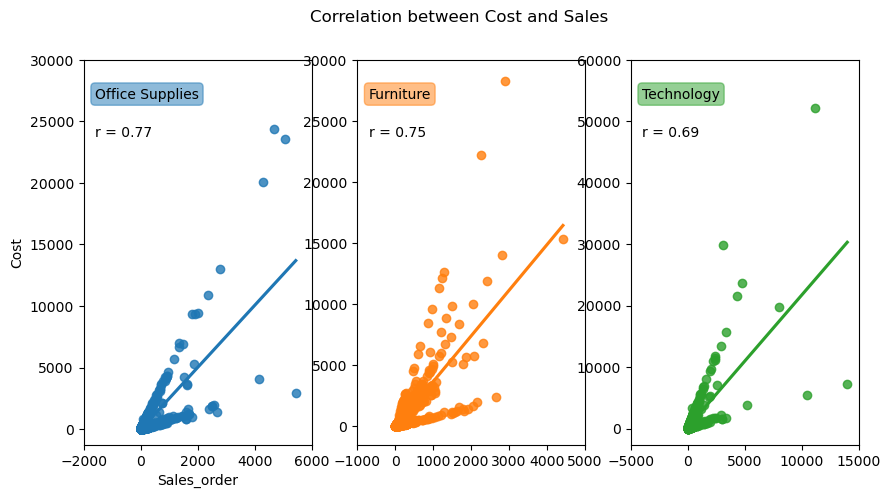

In [64]:
# Define figure grid and its title
fig, ((ax1, ax2,ax3)) = plt.subplots(1, 3, figsize=(10,5))
axs = [ax1, ax2, ax3]
fig.suptitle('Correlation between Cost and Sales')

for i, (ax, country) in enumerate(zip(axs, var_type)):
    data = sales_clean[sales_clean['Category'] == country]
    # Plot each graph separated
    ax = plt.subplot(1, 3, i + 1)
    g = sns.regplot(data, x='Sales', y='cost', ci=False, color=colors[i])
    plt.annotate(country, xy=(0.05, 0.9), xycoords='axes fraction', bbox=dict(boxstyle="round", fc=colors[i], ec=colors[i], alpha=0.5))
    # Find and plot Pearson Correlation (r) for each graph
    r = stats.pearsonr(data.Sales, data.cost)[0]
    plt.annotate(f'r = {r :.2f}', xy=(0.05, 0.8), xycoords='axes fraction')
    # x軸為profit, 取小數點為2
    xticks = g.get_xticks()
    xticks =[*set([round(tick,2) for tick in xticks])]
    g.set(xticks=xticks)
    #xlabels = [tick / 1e12 for tick in xticks]
    #plt.xticks(ticks=xticks[1:-1], labels=xlabels[1:-1])
    # Transform Y-axis labels in integers
    yticks = [*set([round(tick,2) for tick in g.get_yticks() if tick>=0])]
    g.set(yticks=yticks)
    # Remove X and Y labels from graphs in the middle
    if ax in [ax1]:
        plt.ylabel('Cost')
    else:
        plt.ylabel('')
    if ax in [ax1]:
        plt.xlabel('Sales_order')
    else:
        plt.xlabel('')

### 關聯分析
- 根據每一個產品找出相關的關聯分析，辦公器具、家具和科技產品的利潤和折扣的關聯性，計算R^2
- xtick 指出現在第一個圖表，ytick出現在第一個圖表